In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.layers import Dense
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\arifm\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\arifm\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\arifm\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\arifm\Anaconda3\envs\tf-gpu\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\arifm\Anaconda3\envs\tf-gpu\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The paging file is too small for this operation to complete.

During handling 

TypeError: can only concatenate str (not "list") to str

In [2]:
epochs = 5
DIR = r"C:\Users\arifm\OneDrive\Documents\PRJ400\blood cells\blood-cells\dataset2-master\dataset2-master\images"
TYPE = ['TEST','TRAIN']
dir_list = ['NEUTROPHIL', 'EOSINOPHIL','MONOCYTE','LYMPHOCYTE']
batch_size = 32

In [3]:
def create_data(DATADIR):
    training_data = []
    for category in dir_list:
        print(category)
        path = os.path.join(DATADIR,category)
        class_num = dir_list.index(category)
        for img in os.listdir(path):
            img_array =cv2.imread(path+ '/' + img)
            img_file = scipy.misc.imresize(arr=img_array, size=(128, 128, 3))
            training_data.append([img_file, class_num])
        print(len(training_data))
    return training_data

In [4]:
import random
data_test = create_data(DIR + "/" + TYPE[0])
data_train = create_data(DIR + "/" + TYPE[1])

random.shuffle(data_test)
random.shuffle(data_train)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



NEUTROPHIL
Traceback (most recent call last):
  File "C:\Users\arifm\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-c868cb88061e>", line 2, in <module>
    data_test = create_data(DIR + "/" + TYPE[0])
  File "<ipython-input-3-309cb1feed3c>", line 5, in create_data
    path = os.path.join(DATADIR,category)
NameError: name 'os' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\arifm\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2034, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\arifm\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_core\py

NameError: name 'os' is not defined

In [5]:
# capital X for feature set # feature set has to be numpy array
X_train = []
X_test = []
#y is your training set
y_train = []
y_test = []
for features, label in data_train:
    X_train.append(features)
    y_train.append(label)
    
for features, label in data_test:
    X_test.append(features)
    y_test.append(label)
    
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

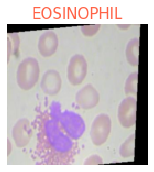

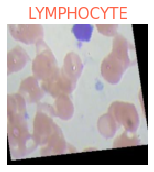

In [14]:
for k in range(2):
    plt.figure(figsize=(25,15))
    plt.subplot(5, 5,2)
    plt.yticks([])
    plt.xticks([])
    category = y_train[k]
    plt.title(dir_list[category] , color='tomato').set_size(15)
    plt.axis('off')
    image = X_train[k]
    image = image[:, :, [2, 1, 0]] 
    plt.imshow(image)

In [15]:
#plt.imshow(X[10])
#plt.show()
print(len(X_train),len(y_train))
print(X_train[10].shape)

9957 9957
(128, 128, 3)


In [16]:
#saving the data for further use
import pickle

#pickle is like json data is serilised for python
pickle_out = open(r"C:\Users\arifm\OneDrive\Documents\PRJ400\blood cells\Data\X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open(r"C:\Users\arifm\OneDrive\Documents\PRJ400\blood cells\Data\y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open(r"C:\Users\arifm\OneDrive\Documents\PRJ400\blood cells\Data\X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open(r"C:\Users\arifm\OneDrive\Documents\PRJ400\blood cells\Data\y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [17]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [18]:
print(y_train[3000])
print(y_test[650])

2
2


In [14]:
def get_model():
    model = tf.keras.Sequential()
    # Must define the input shape in the first layer of the neural network
    # conv layer 1
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=X_train.shape[1:])) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))
    #conv layer 2
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))
    #conv layer 3
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(4, activation='softmax'))
    # Take a look at the model summary
    model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

    return model

In [15]:
model = get_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 120, 160, 64)      832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 80, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 80, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 80, 16)        4112      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 80, 8)         520       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 80, 32)        1056      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 40, 32)       

In [16]:
# fits the model on batches
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=epochs,
    shuffle=True,
    batch_size=batch_size)

model.save_weights('first1_model.h5')

Train on 7965 samples, validate on 1992 samples
Epoch 1/2
7040/7965 [=========================>....] - ETA: 25s - loss: 1.3916 - accuracy: 0.2464

KeyboardInterrupt: 

In [92]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


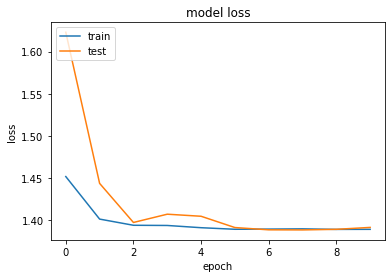

In [12]:
def plot_learning_curve(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.clf()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

plot_learning_curve(history)

In [116]:
from sklearn.metrics import accuracy_score

print('Predicting on test data')
#y_pred = np.rint(model.predict(X_test))

#print(accuracy_score(y_test, y_pred))

Predicting on test data


In [117]:
from sklearn.metrics import confusion_matrix

#print(confusion_matrix(y_test, y_pred))